# Diagnosis

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

sys.path.append('..')
import wordlebot

sns.set()
plt.style.use('ggplot')
fontdict = {'fontsize': 15}
pd.options.display.max_rows = 150

## Load Data

In [58]:
import json
path = '../data'
with open(f'{path}/wordle-candidates-new.json', 'r') as file:
    wordle_candidates_new = json.load(file)
        
with open(f'{path}/wordle-answers-new.json', 'r') as file:
    wordle_answers_new = json.load(file)

wordle_candidates_new = pd.DataFrame(wordle_candidates_new['words'], columns=['word'])
wordle_answers_new = pd.DataFrame(wordle_answers_new['words'], columns=['word'])

In [63]:
print(wordle_answers.loc[~wordle_answers.word.isin(wordle_answers_new.word)].word.tolist())

['agora', 'pupal', 'lynch', 'fibre', 'slave', 'wench']


In [62]:
print(wordle_candidates.loc[~wordle_candidates.word.isin(wordle_candidates_new.word)].word.tolist())

['bitch', 'chink', 'coons', 'darky', 'dyked', 'dykes', 'dykey', 'faggy', 'fagot', 'gooks', 'homos', 'kikes', 'lesbo', 'pussy', 'sluts', 'spick', 'spics', 'spiks', 'whore']


In [16]:
words = ['arles', 'arose', 'dares', 'lares', 'lores', 'nares',
        'raile', 'raise', 'rales', 'rates', 'reais', 'roate',
        'soare', 'stare', 'tales', 'tares', 'tores']

algos = ['lf', 'gyx', 'lf-pop', 'gyx-pop']

wordle_candidates, wordle_answers = wordlebot.load_data('../data')
wordle = wordle_candidates.loc[
    wordle_candidates.word.apply(lambda x: len(x)==len(set(x)))
].append(wordle_answers).reset_index(drop=True)

In [3]:
df = pd.DataFrame()
all_data = pd.DataFrame()

for algo in algos:
    print(f'Loading {algo}...')
    for word in words:
        download_path = f'../kernel_output/{algo}/'
        if algo == 'gyx':
            algo_correct = 'expected_gyx'
        elif algo == 'lf-pop':
            algo_correct = 'lf'
        elif algo == 'gyx-pop':
            algo_correct = 'expected_gyx'
        else:
            algo_correct = algo
        filename = f"wordlebot-{algo_correct}-{word}.csv"
        
        if filename in os.listdir(download_path):
            temp_df = pd.read_csv(f'{download_path}{filename}')
            temp_df['algo'] = algo
            all_data = all_data.append(temp_df)
            with open(f"{download_path}wordlebot-{algo}-{word}.log") as f:
                temp_log = f.readlines()
            runtime = pd.DataFrame(eval(''.join(temp_log))).time.iloc[-1]
            temp_results = pd.DataFrame([{
                'Seed Word': word,
                'Ranking Algorithm': algo,
                # 'Runtime': runtime,
                'Mean Steps': temp_df.steps.mean(),
                'Success Rate': temp_df.steps.le(6).mean(),
                '3-Steps or Less': temp_df.steps.le(3).mean(),
                'Worst Case': temp_df.steps.max()
            }])
            
            df = df.append(temp_results)

print('Loading ncands...')
for word in words:
    data_path = '../results'
    filename = f'wordlebot_{word}.csv'
    if filename in os.listdir(data_path):
        temp_df = pd.read_csv(f'{data_path}/{filename}')
        temp_df['algo'] = 'ncands'
        all_data = all_data.append(temp_df)
        temp_results = pd.DataFrame([{
            'Seed Word': word,
            'Ranking Algorithm': 'ncands',
            # 'Runtime': runtime,
            'Mean Steps': temp_df.steps.mean(),
            'Success Rate': temp_df.steps.le(6).mean(),
            '3-Steps or Less': temp_df.steps.le(3).mean(),
            'Worst Case': temp_df.steps.max()
        }])
        df = df.append(temp_results)
        
print('Loading entropy...')
for word in words:
    data_path = '../results'
    filename = f'wordlebot-entropy-{word}.csv'
    if filename in os.listdir(data_path):
        temp_df = pd.read_csv(f'{data_path}/{filename}')
        temp_df['algo'] = 'entropy'
        all_data = all_data.append(temp_df)
        temp_results = pd.DataFrame([{
            'Seed Word': word,
            'Ranking Algorithm': 'entropy',
            # 'Runtime': runtime,
            'Mean Steps': temp_df.steps.mean(),
            'Success Rate': temp_df.steps.le(6).mean(),
            '3-Steps or Less': temp_df.steps.le(3).mean(),
            'Worst Case': temp_df.steps.max()
        }])
        df = df.append(temp_results)

Loading lf...
Loading gyx...
Loading lf-pop...
Loading gyx-pop...
Loading ncands...
Loading entropy...


## Helper Functions

In [23]:
def get_one_missing(pattern):
    data = wordle_answers.copy()
    for i, l in enumerate(pattern):
        if l == '_':
            continue
        else:
            data = data.loc[data.word.str[i].eq(l)]
    return data.word.tolist()

## Overall

In [4]:
adf = all_data.drop('Unnamed: 0', axis=1)
adf['words'] = adf.words.apply(eval)
adf['word'] = adf.words.apply(lambda x: x[0])
adf['solution'] = adf.words.apply(lambda x: x[-1])
adf = adf.sort_values(['solution', 'word']).reset_index(drop=True)

In [5]:
solution_scores = adf.groupby('solution').agg({
    'steps': [
        ('Mean Steps', 'mean'),
        ('Success Rate', lambda x: np.mean(x < 7)),
        ('3-Steps or Less', lambda x: np.mean(x <= 3))
    ]
})

In [6]:
solution_scores.columns = ['Mean Steps', 'Success Rate', '3-Steps or Less']

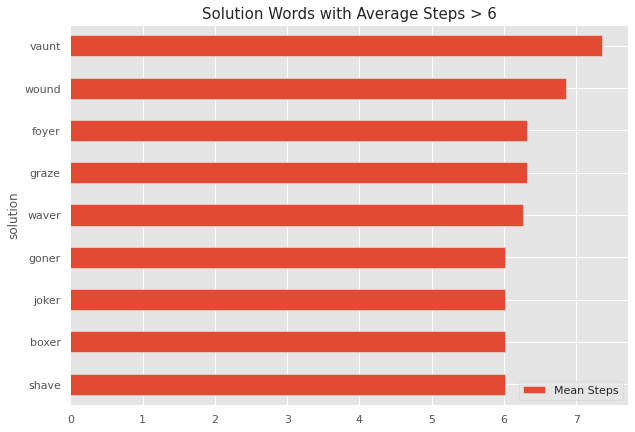

,Mean Steps,Success Rate,3-Steps or Less
solution,,,
vaunt,7.352941,0.137255,0.000000
wound,6.852941,0.196078,0.078431
foyer,6.323529,0.539216,0.009804
graze,6.323529,0.568627,0.000000
waver,6.264706,0.627451,0.000000
goner,6.019608,0.529412,0.166667
joker,6.019608,0.588235,0.009804
boxer,6.009804,0.666667,0.009804
shave,6.009804,0.460784,0.156863


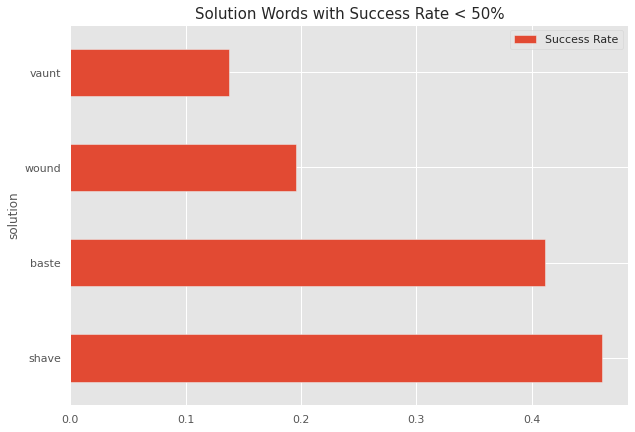

,Mean Steps,Success Rate,3-Steps or Less
solution,,,
vaunt,7.352941,0.137255,0.000000
wound,6.852941,0.196078,0.078431
baste,5.676471,0.411765,0.333333
shave,6.009804,0.460784,0.156863


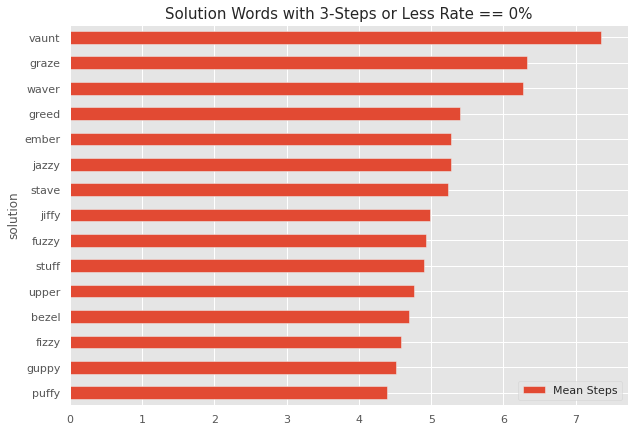

,Mean Steps,Success Rate,3-Steps or Less
solution,,,
vaunt,7.352941,0.137255,0.0
graze,6.323529,0.568627,0.0
waver,6.264706,0.627451,0.0
greed,5.401961,0.970588,0.0
ember,5.274510,0.892157,0.0
jazzy,5.274510,0.901961,0.0
stave,5.235294,0.980392,0.0
jiffy,4.990196,1.000000,0.0
fuzzy,4.931373,0.970588,0.0


In [7]:
df_low_avg_steps = solution_scores.loc[solution_scores['Mean Steps'].gt(6)].sort_values('Mean Steps', ascending=False)
df_low_avg_steps[['Mean Steps']].plot.barh(figsize=(10,7))
plt.gca().invert_yaxis()
plt.title('Solution Words with Average Steps > 6', fontdict=fontdict)
plt.show()
display(df_low_avg_steps)


df_low_success = solution_scores.loc[solution_scores['Success Rate'].lt(0.5)].sort_values('Success Rate', ascending=True)
df_low_success[['Success Rate']].plot.barh(figsize=(10,7))
plt.gca().invert_yaxis()
plt.title('Solution Words with Success Rate < 50%', fontdict=fontdict)
plt.show()
display(df_low_success)

df_zero_3step = solution_scores.loc[solution_scores['3-Steps or Less'].eq(0)].sort_values('Mean Steps', ascending=False)
df_zero_3step[['Mean Steps']].plot.barh(figsize=(10,7))
plt.gca().invert_yaxis()
plt.title('Solution Words with 3-Steps or Less Rate == 0%', fontdict=fontdict)
plt.show()
display(df_zero_3step)

In [8]:
adf.head()

,steps,words,feedback,ncands,algo,word,solution
0,3,"[arles, idant, aback]","['GXXXX', 'XXGXX', 'GGGGG']","[27, 1, 1]",lf,arles,aback
1,3,"[arles, await, aback]","['GXXXX', 'GXGXX', 'GGGGG']","[27, 1, 1]",gyx,arles,aback
2,3,"[arles, idant, aback]","['GXXXX', 'XXGXX', 'GGGGG']","[27, 1, 1]",lf-pop,arles,aback
3,3,"[arles, await, aback]","['GXXXX', 'GXGXX', 'GGGGG']","[27, 1, 1]",gyx-pop,arles,aback
4,3,"[arles, optic, aback]","['GXXXX', 'XXXXY', 'GGGGG']","[27, 1, 1]",ncands,arles,aback


In [24]:
get_one_missing('_aunt')

['jaunt', 'taunt', 'gaunt', 'haunt', 'daunt', 'vaunt']

In [25]:
get_one_missing('gra_e')

['grade', 'grate', 'grave', 'grace', 'grape', 'graze']

In [45]:
get_one_missing('_a_er')

['paper',
 'cater',
 'gamer',
 'payer',
 'parer',
 'baker',
 'safer',
 'tamer',
 'hater',
 'eater',
 'paler',
 'layer',
 'later',
 'taper',
 'caper',
 'wager',
 'racer',
 'lager',
 'gazer',
 'saner',
 'water',
 'maker',
 'eager',
 'rarer',
 'waver',
 'baler',
 'wafer',
 'gayer',
 'taker']

In [47]:
get_one_missing('ja___')

['jaunt', 'jazzy']

In [44]:
get_one_missing('e__er')

['elder', 'eater', 'enter', 'ether', 'ester', 'ember', 'eager']

In [41]:
get_one_missing('gr__d')

['grind', 'greed', 'grand']

In [39]:
get_one_missing('sta_e')

['stale', 'stage', 'stare', 'stake', 'stave', 'state']

In [55]:
get_one_missing('__zzy')

['fuzzy', 'dizzy', 'jazzy', 'fizzy']

In [50]:
get_one_missing('fu__y')

['funny', 'furry', 'fuzzy', 'funky', 'fully', 'fussy']

In [54]:
get_one_missing('stu__')

['stuck', 'study', 'stung', 'stunt', 'stump', 'stunk', 'stuff']

In [40]:
get_one_missing('u__er')

['usher', 'ulcer', 'udder', 'upper', 'utter', 'under']

In [53]:
get_one_missing('be_e_')

['beset', 'betel', 'beget', 'bevel', 'beret', 'bezel']

In [51]:
get_one_missing('fi__y')

['filmy', 'fishy', 'fiery', 'filly', 'fifty', 'fizzy']